# 8. Data Analytics I

Create a Linear Regression Model using Python/R to predict home prices using Boston
Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset
contains information about various houses in Boston through different parameters. There are
506 samples and 14 feature variables in this dataset.

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns

In [82]:
ds = pd.read_csv( "boston_housing.csv" )
ds

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### 1. About the dataset


    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's


In [83]:
ds.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [84]:
ds.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

## 2. Exploratory Data Analysis

### 2.1. Summary Statistics

In [85]:
ds.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

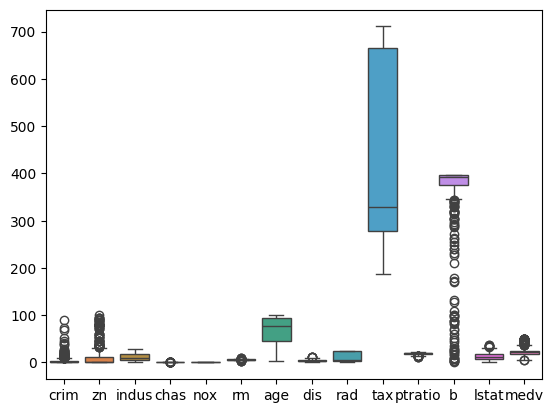

In [86]:
sns.boxplot( data=ds )

### 2.2. Correlation Analysis

In [104]:
ds.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.325160,0.469416,-0.048580,0.548323,-0.171687,0.402817,-0.428820,0.053062,0.402170,0.272066,0.068971,0.457977,-0.330080
zn,-0.325160,1.000000,-0.262096,0.020274,-0.470424,0.278400,-0.253406,0.425397,-0.053708,-0.172419,-0.415844,-0.024035,-0.240123,0.277346
indus,0.469416,-0.262096,1.000000,0.107076,0.520649,-0.061710,0.368324,-0.450949,0.001804,0.529008,0.330036,0.022508,0.391588,-0.354402
chas,-0.048580,0.020274,0.107076,1.000000,0.026705,-0.054154,0.086784,-0.094252,-0.063700,-0.158085,-0.116814,-0.082773,0.144264,0.088814
nox,0.548323,-0.470424,0.520649,0.026705,1.000000,-0.207798,0.666780,-0.722706,0.363013,0.484798,0.385518,0.165249,0.515178,-0.391941
rm,-0.171687,0.278400,-0.061710,-0.054154,-0.207798,1.000000,-0.104326,0.079330,-0.044764,-0.047834,-0.126965,-0.120238,-0.603433,0.618453
age,0.402817,-0.253406,0.368324,0.086784,0.666780,-0.104326,1.000000,-0.595085,0.169904,0.380461,0.194622,0.145497,0.605238,-0.392513
dis,-0.428820,0.425397,-0.450949,-0.094252,-0.722706,0.079330,-0.595085,1.000000,-0.247369,-0.523883,-0.414226,-0.133527,-0.340490,0.124079
rad,0.053062,-0.053708,0.001804,-0.063700,0.363013,-0.044764,0.169904,-0.247369,1.000000,0.511239,-0.021753,0.034099,0.140653,-0.168627
tax,0.402170,-0.172419,0.529008,-0.158085,0.484798,-0.047834,0.380461,-0.523883,0.511239,1.000000,0.265369,-0.107464,0.355614,-0.337624


<Axes: >

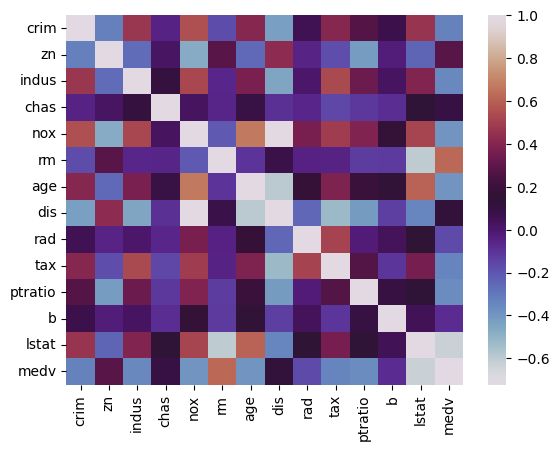

In [103]:
sns.heatmap( ds.corr() , cmap="twilight" )

In [87]:
ds.skew()

crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
b         -2.890374
lstat      0.906460
medv       1.108098
dtype: float64

### 2.2. Outlier Removal

In [89]:
def remove_outliers(
    feature_name: str
):
    global ds
    q3 , q1 = np.percentile( ds[ feature_name ] , [ 75 , 25 ] )
    iqr = q3 - q1
    ds = ds[ (ds[ feature_name ] >= q1 - 1.5 * iqr) & (ds[ feature_name ] <= q3 + 1.5 * iqr) ]

remove_outliers( "crim" )
remove_outliers( "zn" )
remove_outliers( "b" )
remove_outliers( "rad" )
remove_outliers( "tax" )
remove_outliers( "lstat" )
remove_outliers( "medv" )

In [90]:
ds.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.155954,5.722603,8.847466,0.054795,0.498979,6.162630,58.414384,4.213428,4.486301,312.445205,18.427397,393.535890,10.924726,22.315068
std,0.114413,11.541833,4.521242,0.228362,0.056200,0.323472,25.850421,1.467104,0.896247,69.453535,1.607848,4.048847,4.118163,3.699438
min,0.028750,0.000000,2.180000,0.000000,0.409000,5.390000,2.900000,1.668600,3.000000,193.000000,15.200000,379.410000,2.980000,13.300000
25%,0.070543,0.000000,5.640000,0.000000,0.448000,5.915500,38.625000,2.849275,4.000000,270.000000,17.650000,391.380000,7.550000,19.500000
50%,0.127730,0.000000,7.870000,0.000000,0.493000,6.127000,57.400000,4.054650,4.500000,296.000000,18.600000,394.955000,10.285000,21.900000
75%,0.219125,0.000000,10.010000,0.000000,0.544000,6.408500,82.575000,5.415900,5.000000,384.000000,19.200000,396.900000,13.605000,24.350000
max,0.590050,45.000000,21.890000,1.000000,0.624000,6.897000,98.900000,8.013600,6.000000,437.000000,21.200000,396.900000,21.320000,32.500000


<Axes: >

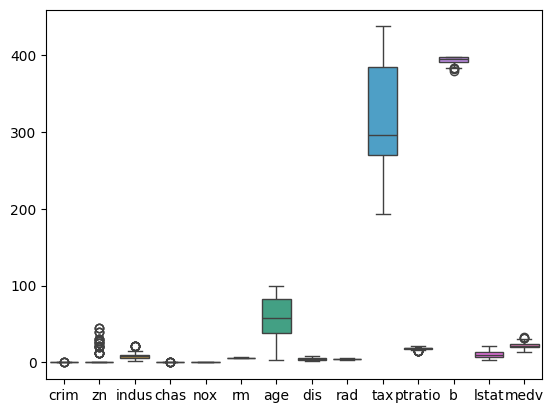

In [91]:
sns.boxplot( data=ds )

In [92]:
ds.skew()

crim       1.498322
zn         1.952712
indus      1.362684
chas       3.953273
nox        0.477435
rm         0.229558
age       -0.118040
dis        0.202011
rad       -0.016639
tax        0.440699
ptratio   -0.156375
b         -1.411075
lstat      0.406729
medv       0.634390
dtype: float64

### 2.3. Data Transformation

#### 2.3.1. Log Transformation

In [93]:
ds[ "crim" ] = np.log2( ds["crim"] )
ds[ "zn" ] = np.cbrt( ds["zn"] )
ds[ "nox" ] = np.log2( ds["nox"] )

<Axes: xlabel='zn'>

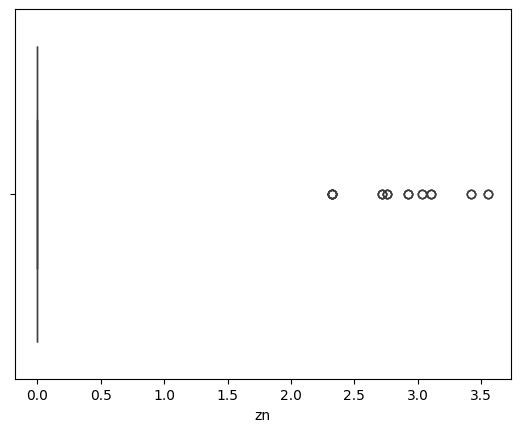

In [94]:
sns.boxplot( data=ds , x="zn" )

<Axes: xlabel='crim'>

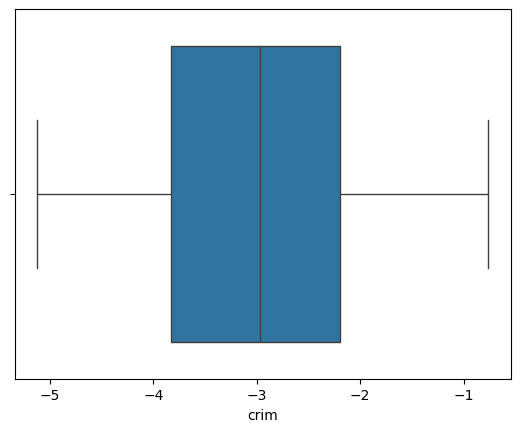

In [95]:
sns.boxplot( data=ds , x="crim" )

<Axes: xlabel='nox'>

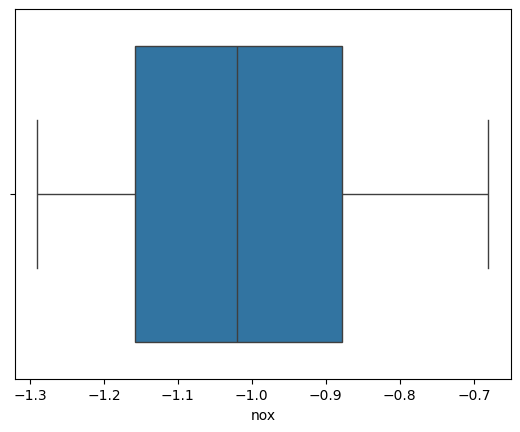

In [96]:
sns.boxplot( data=ds , x="nox" )

<Axes: >

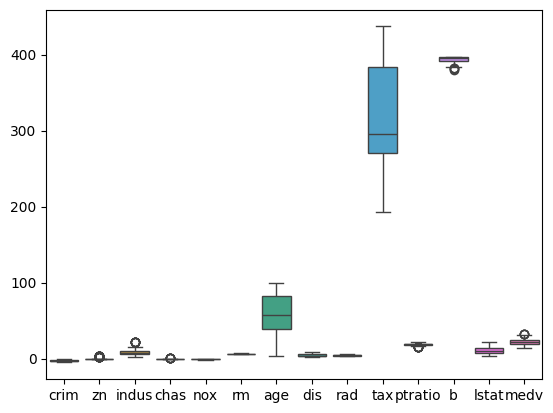

In [97]:
sns.boxplot( data=ds )

In [98]:
ds.skew()

crim      -0.003047
zn         1.367498
indus      1.362684
chas       3.953273
nox        0.269119
rm         0.229558
age       -0.118040
dis        0.202011
rad       -0.016639
tax        0.440699
ptratio   -0.156375
b         -1.411075
lstat      0.406729
medv       0.634390
dtype: float64

#### 2.3.2. Min-max normalization

In [99]:
def min_max_normalize( name: str ):
    ds[ name ] = (ds[ name ] - ds[ name ].min()) / ( ds[ name ].max() - ds[ name ].min() )

for col in ds.drop( [ "medv" ] , axis=1 ).columns:
    min_max_normalize( col )

## 3. Model Building

### 3.1. train-test split

In [105]:
from sklearn.model_selection import train_test_split

X = np.asarray( ds.drop( [ "medv" ] , axis=1 ) )
y = np.asarray( ds[ "medv" ] )

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3 )

In [106]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit( X_train , y_train )
y_pred = reg.predict( X_test )

<Axes: xlabel='medv'>

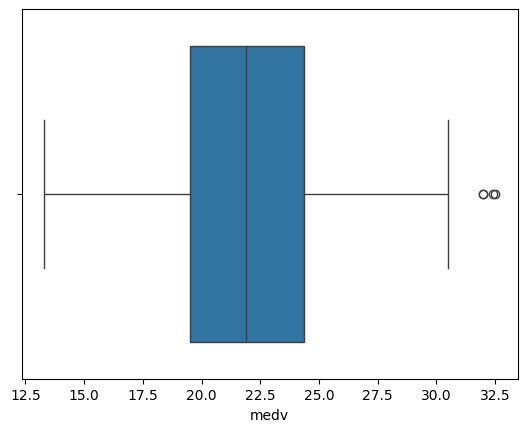

In [108]:
sns.boxplot( data=ds , x="medv" ) 

In [109]:
from sklearn.metrics import mean_absolute_error , r2_score

print( mean_absolute_error( y_test , y_pred ) )

# Reference: https://en.wikipedia.org/wiki/Coefficient_of_determination
print( r2_score( y_test , y_pred ) )

1.6611609911015393
0.763262867667589
